In [50]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [51]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)
csv_path


'C:\\Users\\pgyaf\\.keras\\datasets\\jena_climate_2009_2016.csv'

In [52]:
df = pd.read_csv(csv_path)
df = df[5::6]
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


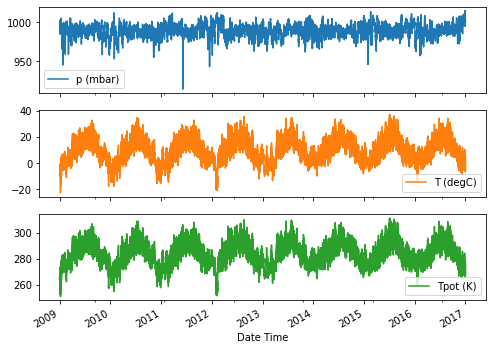

In [53]:
features=df[['p (mbar)','T (degC)','Tpot (K)']]
features.index=date_time
_=features.plot(subplots=True)

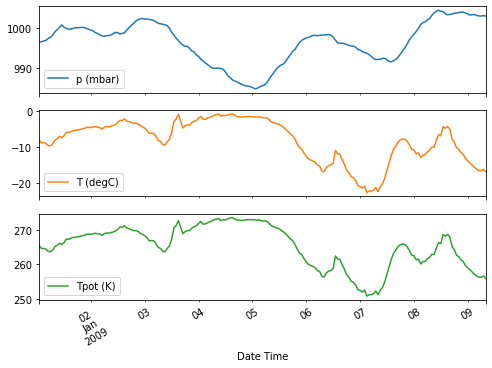

In [54]:
features=features[:200]
_=features.plot(subplots=True)

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [56]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0
wv

5         0.21
11        0.25
17        0.18
23        0.10
29        0.40
          ... 
420521    0.87
420527    1.02
420533    0.71
420539    0.35
420545    0.56
Name: wv (m/s), Length: 70091, dtype: float64

In [57]:
wv.min()

0.0

Text(0, 0.5, 'Wind Velocity [m/s]')

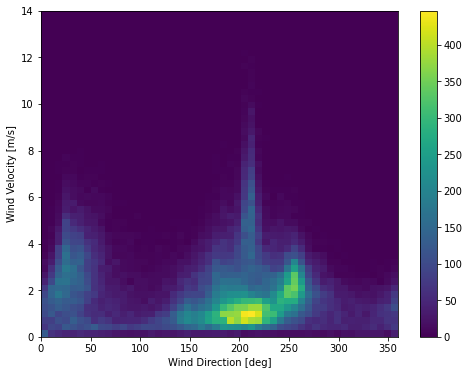

In [58]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50))
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [59]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')



In [60]:
#Radians
wd_rad=df['wd (deg)']*np.pi/180

df['Wx']=wv*np.cos(wd_rad)
df['Wy']=wv*np.sin(wd_rad)

df['max Wx']=max_wv*np.cos(wd_rad)
df['max Wy']=max_wv*np.sin(wd_rad)

Text(0, 0.5, 'Wind Y [m/s]')

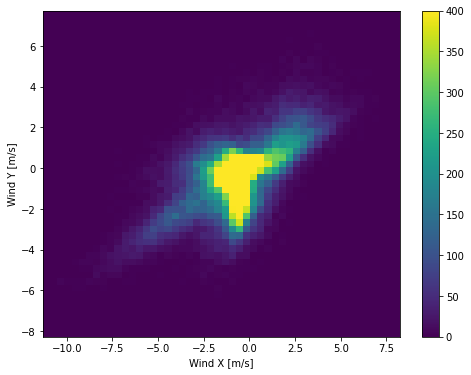

In [61]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')



In [62]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wd (deg),Wx,Wy,max Wx,max Wy
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,192.7,-0.204862,-0.046168,-0.614587,-0.138503
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,190.3,-0.245971,-0.044701,-0.619848,-0.112645
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,167.2,-0.175527,0.039879,-0.614344,0.139576
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,240.0,-0.050000,-0.086603,-0.190000,-0.329090
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,157.0,-0.368202,0.156292,-0.810044,0.343843


In [63]:
timestamp_second=date_time.map(pd.Timestamp.timestamp)
timestamp_second

5         1.230772e+09
11        1.230775e+09
17        1.230779e+09
23        1.230782e+09
29        1.230786e+09
              ...     
420521    1.483211e+09
420527    1.483215e+09
420533    1.483219e+09
420539    1.483222e+09
420545    1.483226e+09
Name: Date Time, Length: 70091, dtype: float64

In [64]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_second * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_second * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_second * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_second * (2 * np.pi / year))

array([ 2.58819045e-01,  5.00000000e-01,  7.07106781e-01,  8.66025404e-01,
        9.65925826e-01,  1.00000000e+00,  9.65925826e-01,  8.66025404e-01,
        7.07106781e-01,  5.00000000e-01,  2.58819045e-01,  6.90329904e-12,
       -2.58819045e-01, -5.00000000e-01, -7.07106781e-01, -8.66025404e-01,
       -9.65925826e-01, -1.00000000e+00, -9.65925826e-01, -8.66025404e-01,
       -7.07106781e-01, -5.00000000e-01, -2.58819045e-01, -1.20299873e-11,
        2.58819045e-01])

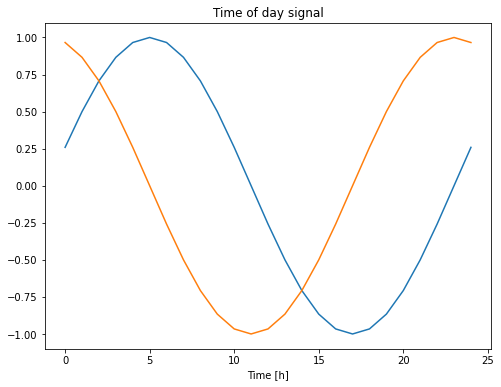

In [65]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')
np.array(df['Day sin'])[:25]

In [66]:
coloumn_incidence={n:i for i,n in enumerate(df.columns)}
coloumn_incidence


{'p (mbar)': 0,
 'T (degC)': 1,
 'Tpot (K)': 2,
 'Tdew (degC)': 3,
 'rh (%)': 4,
 'VPmax (mbar)': 5,
 'VPact (mbar)': 6,
 'VPdef (mbar)': 7,
 'sh (g/kg)': 8,
 'H2OC (mmol/mol)': 9,
 'rho (g/m**3)': 10,
 'wd (deg)': 11,
 'Wx': 12,
 'Wy': 13,
 'max Wx': 14,
 'max Wy': 15,
 'Day sin': 16,
 'Day cos': 17,
 'Year sin': 18,
 'Year cos': 19}

In [67]:
#splitting train, validation, test dataset (70,20,10)
no=len(df)

train=df[:int(0.7*no)]
validation=df[int(0.7*no):int(0.9*no)]
test=df[int(0.9*no):]

In [68]:
#Data Normaization

train_mean=train.mean()
train_std=train.std()


train=(train-train_mean)/train_std
validation=(validation-train_mean)/train_std
test=(test-train_mean)/train_std
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(train)
# train=scaler.transform(train)
# validation=scaler.transform(validation)
# test=scaler.transform(test)
# df=scaler.transform(df)
df=(df-train_mean)/train_std

In [76]:
df = pd.DataFrame(data=df)
df_std = df.melt(var_name='Column', value_name='Normalized')
print(df)
print(df_std)

        p (mbar)  T (degC)  Tpot (K)  Tdew (degC)    rh (%)  VPmax (mbar)  \
5       0.945308 -1.982473 -2.041888    -1.918973  1.117102     -1.302851   
11      0.959770 -2.078372 -2.138166    -2.060964  1.044617     -1.330143   
17      0.986284 -2.070284 -2.132435    -2.045187  1.062738     -1.328843   
23      1.004362 -2.098014 -2.161090    -2.096820  1.008375     -1.336641   
29      1.061006 -2.165028 -2.232152    -2.187178  0.984214     -1.353535   
...          ...       ...       ...          ...       ...           ...   
420521  1.629854 -1.165600 -1.281981    -1.428459 -0.235937     -0.996148   
420527  1.535849 -1.214127 -1.322097    -1.640728 -0.580840     -1.019541   
420533  1.510540 -1.370107 -1.475683    -1.649333 -0.181573     -1.087119   
420539  1.445460 -1.386283 -1.487144    -1.685190 -0.217815     -1.094917   
420545  1.380380 -1.506445 -1.600615    -1.820009 -0.199694     -1.143002   

        VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3

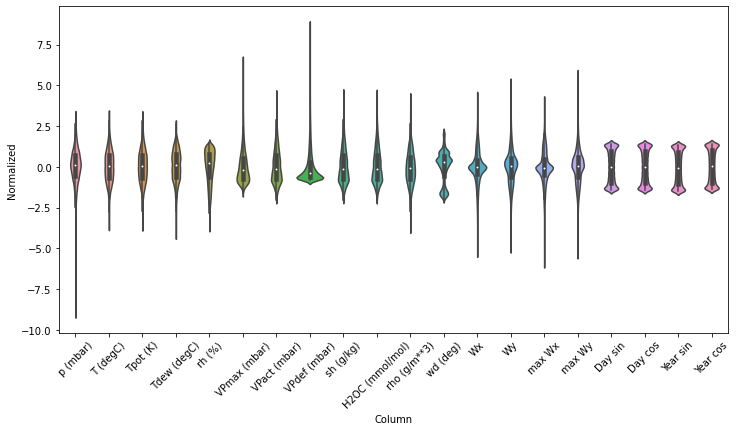

In [74]:
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_=ax.set_xticklabels(df.keys(), rotation=45)